# Rank Features of a Smartphone - Build a Python Application to Classify and Rank Dataset.

## Data Description

battery_power: Total energy a battery can store in one time measured in mAh

blue: Has bluetooth or not

clock_speed: speed at which microprocessor executes instructions

dual_sim: Has dual sim support or not

fc: Front Camera mega pixels

four_g: Has 4G or not

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Mega Bytes

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

talk_time: longest time that a single battery charge will last when you are

three_g: Has 3G or not

touch_screen: Has touch screen or not

wifi: Has wifi or not

price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


import plotly.express as px

In [2]:
#Reading train dataset
train_data=pd.read_csv('train.csv')
pd.set_option('display.max_columns',None)
train_data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1

In [3]:
#Reading Test Dataset
test_data=pd.read_csv('test.csv')
pd.set_option('display.max_columns',None)
test_data.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193        3  16        226      1412  3476    12     7   
1    0.8        191        5  12        746       857  3895     6     0   
2    0.9        186        3   4       1270      1366  2396    17    10   
3    0.5         96        8  20        295      1752  3893    10     0   
4    0.5        108        6  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1

In [4]:
test_data=test_data.drop('id',axis=1)

In [5]:
train_data.shape

(2000, 21)

In [6]:
test_data.shape

(1000, 20)

In [7]:
#check null and Dtypes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_scr

In [9]:
#display summary statistics for a dataframe
train_data.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500     0.501750   140.249000     4.520500   
std       0.499662    18.145715     0.288416    35.399655     2.287837   
min       0.000000     2.000000     0.100000    80.000000     1.000000   
25%       0.000000    16.000000     0.200000   109.000000     3.000000   
50%       1.000000    32.000000     0.500000   141.000000     4.000000   
75%       1.000000    48.000000     0.800000   170.000000     7.000000   
max       1.000000    64.000000     1.000000   200.000000     8.000000   

                pc    px_height     px_width          ram         sc_h  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      9.916500   645.108000  1251.515500  2124.213000    12.306500   
std       6.064315   443.780811   432.199447  1084.732044     4.213245   
min       0.000000     0.000000   500.000000   256.000000     5.000000   
25%       5.000000   282.750000   874.750000  1207.500000     9.000000   
50%      10.000000   564.000000  1247.000000  2146.500000    12.000000   
75%      15.000000   947.250000  1633.000000  3064.500000    16.000000   
max      20.000000  1960.000000  1998.000000  3998.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  \
count  2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean      5.767000    11.011000     0.761500      0.503000     0.507000   
std       4.356398     5.463955     0.426273      0.500116     0.500076   
min       0.000000     2.000000     0.000000      0.000000     0.000000   
25%       2.000000     6.000000     1.000000      0.000000     0.000000   
50%       5.000000    11.000000     1.000000      1.000000     1.000000   
75%       9.000000    16.000000     1.000000      1.000000     1.000000   
max      18.000000    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000

In [10]:
test_data.describe()

battery_power         blue  clock_speed     dual_sim           fc  \
count    1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     1248.510000     0.516000     1.540900     0.517000     4.593000   
std       432.458227     0.499994     0.829268     0.499961     4.463325   
min       500.000000     0.000000     0.500000     0.000000     0.000000   
25%       895.000000     0.000000     0.700000     0.000000     1.000000   
50%      1246.500000     1.000000     1.500000     1.000000     3.000000   
75%      1629.250000     1.000000     2.300000     1.000000     7.000000   
max      1999.000000     1.000000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep   mobile_wt      n_cores  \
count  1000.000000  1000.000000  1000.000000  1000.00000  1000.000000   
mean      0.487000    33.652000     0.517500   139.51100     4.328000   
std       0.500081    18.128694     0.280861    34.85155     2.288155   
min       0.000000     2.000000     0.100000    80.00000     1.000000   
25%       0.000000    18.000000     0.300000   109.75000     2.000000   
50%       0.000000    34.500000     0.500000   139.00000     4.000000   
75%       1.000000    49.000000     0.800000   170.00000     6.000000   
max       1.000000    64.000000     1.000000   200.00000     8.000000   

                pc    px_height     px_width          ram         sc_h  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     10.054000   627.121000  1239.774000  2138.998000    11.995000   
std       6.095099   432.929699   439.670981  1088.092278     4.320607   
min       0.000000     0.000000   501.000000   263.000000     5.000000   
25%       5.000000   263.750000   831.750000  1237.250000     8.000000   
50%      10.000000   564.500000  1250.000000  2153.500000    12.000000   
75%      16.000000   903.000000  1637.750000  3065.500000    16.000000   
max      20.000000  1907.000000  1998.000000  3989.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  
count  1000.000000  1000.000000  1000.000000    1000.00000  1000.000000  
mean      5.316000    11.085000     0.756000       0.50000     0.507000  
std       4.240062     5.497636     0.429708       0.50025     0.500201  
min       0.000000     2.000000     0.000000       0.00000     0.000000  
25%       2.000000     6.750000     1.000000       0.00000     0.000000  
50%       5.000000    11.000000     1.000000       0.50000     1.000000  
75%       8.000000    16.000000     1.000000       1.00000     1.000000  
max      18.000000    20.000000     1.000000       1.00000     1.000000

In [11]:
#checking for duplicate rows
train_data.duplicated().sum()

0

In [12]:
test_data.duplicated().sum()

0

In [13]:
#checking null values in train data
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [14]:
#checking null values in test_data
test_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

# EDA

## Univariate Analysis

In [15]:
#analysing target column

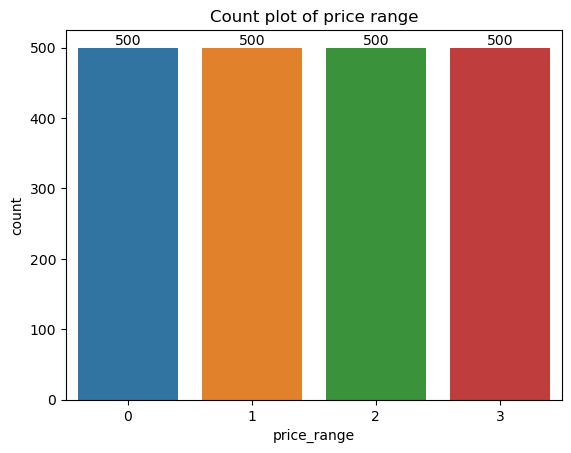

In [16]:
price_range=sns.countplot('price_range',data=train_data)
plt.title('Count plot of price range')
for i in price_range.containers:
    price_range.bar_label(i)


Target column has 4 classes.
0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).
number of 4 price range is equal.so this is a balanced dataset

### Plotting distribution graphs

In [17]:
cols=train_data[['battery_power', 'clock_speed','fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',
        'wifi', 'price_range']]

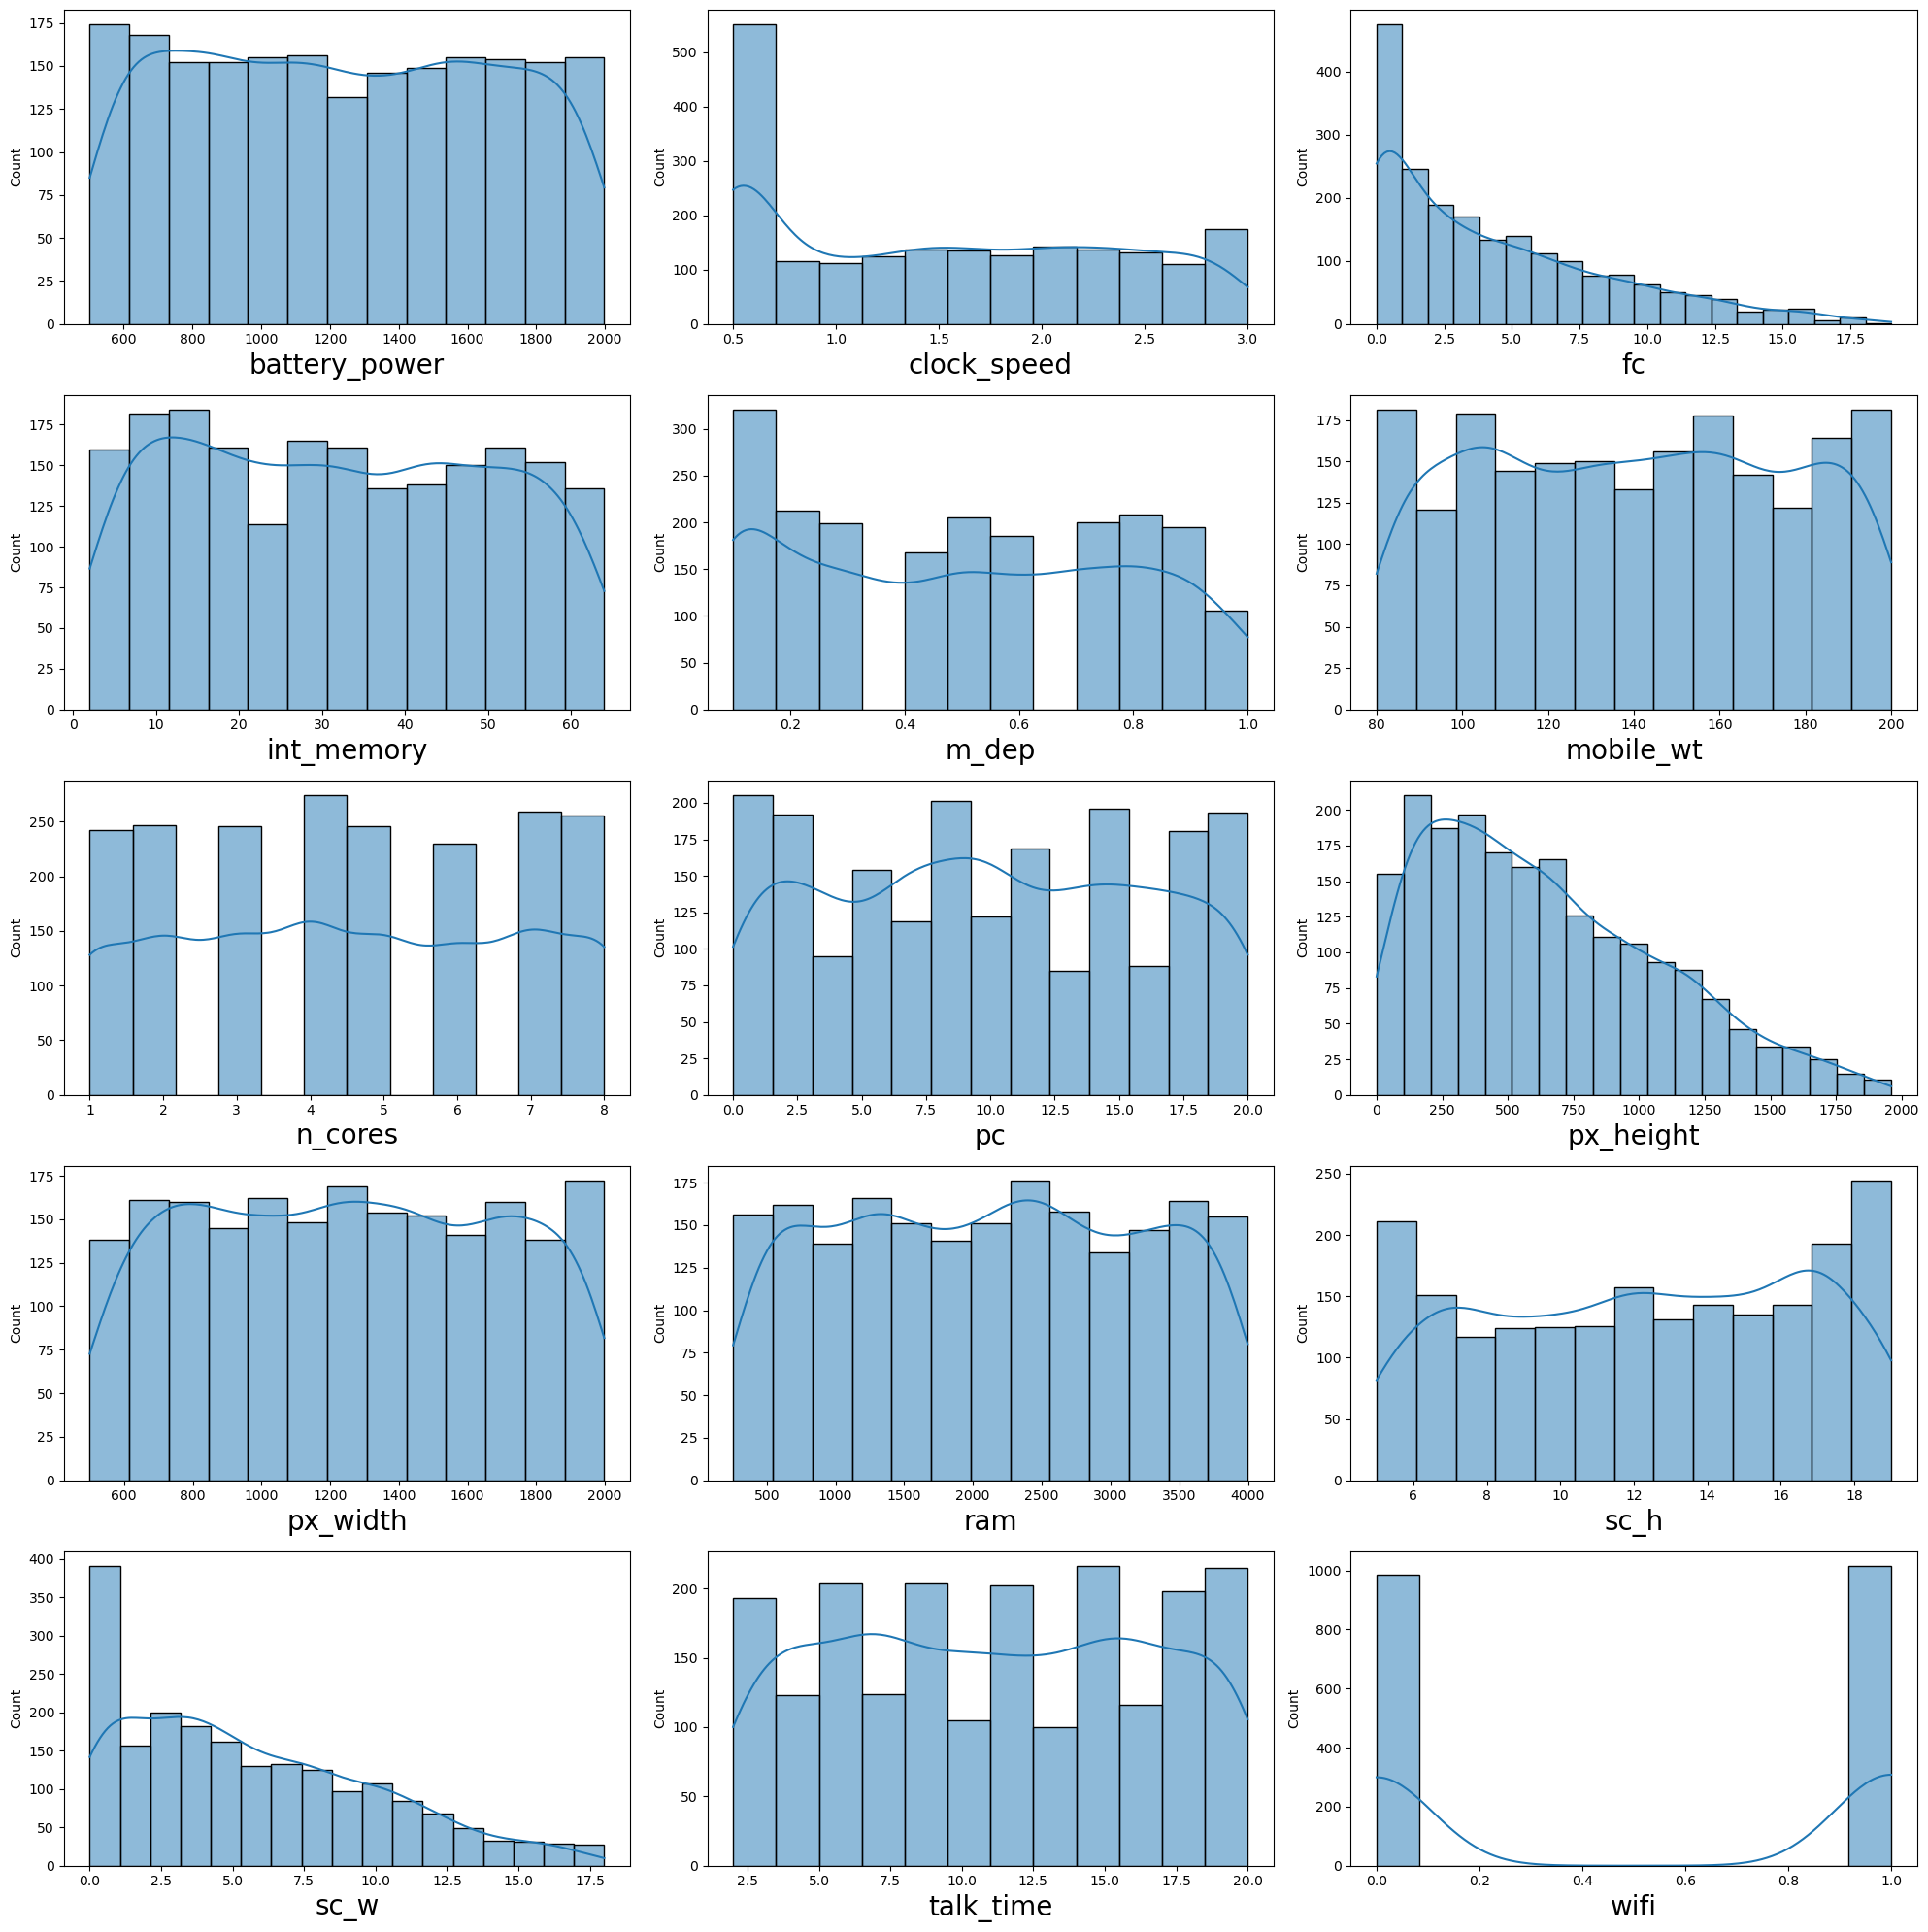

In [18]:
plt.figure(figsize=(20,20))
plotnumber =1
for column in cols:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.histplot(cols[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

we can understand the distribution of values for single variable.As we can see skewness in these plots, there will be outliers in collected data

### Count plot of individual columns

In [19]:
cols_count_plot=train_data[['blue','dual_sim','clock_speed', 'fc', 'four_g',
        'm_dep','n_cores', 'pc','sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]

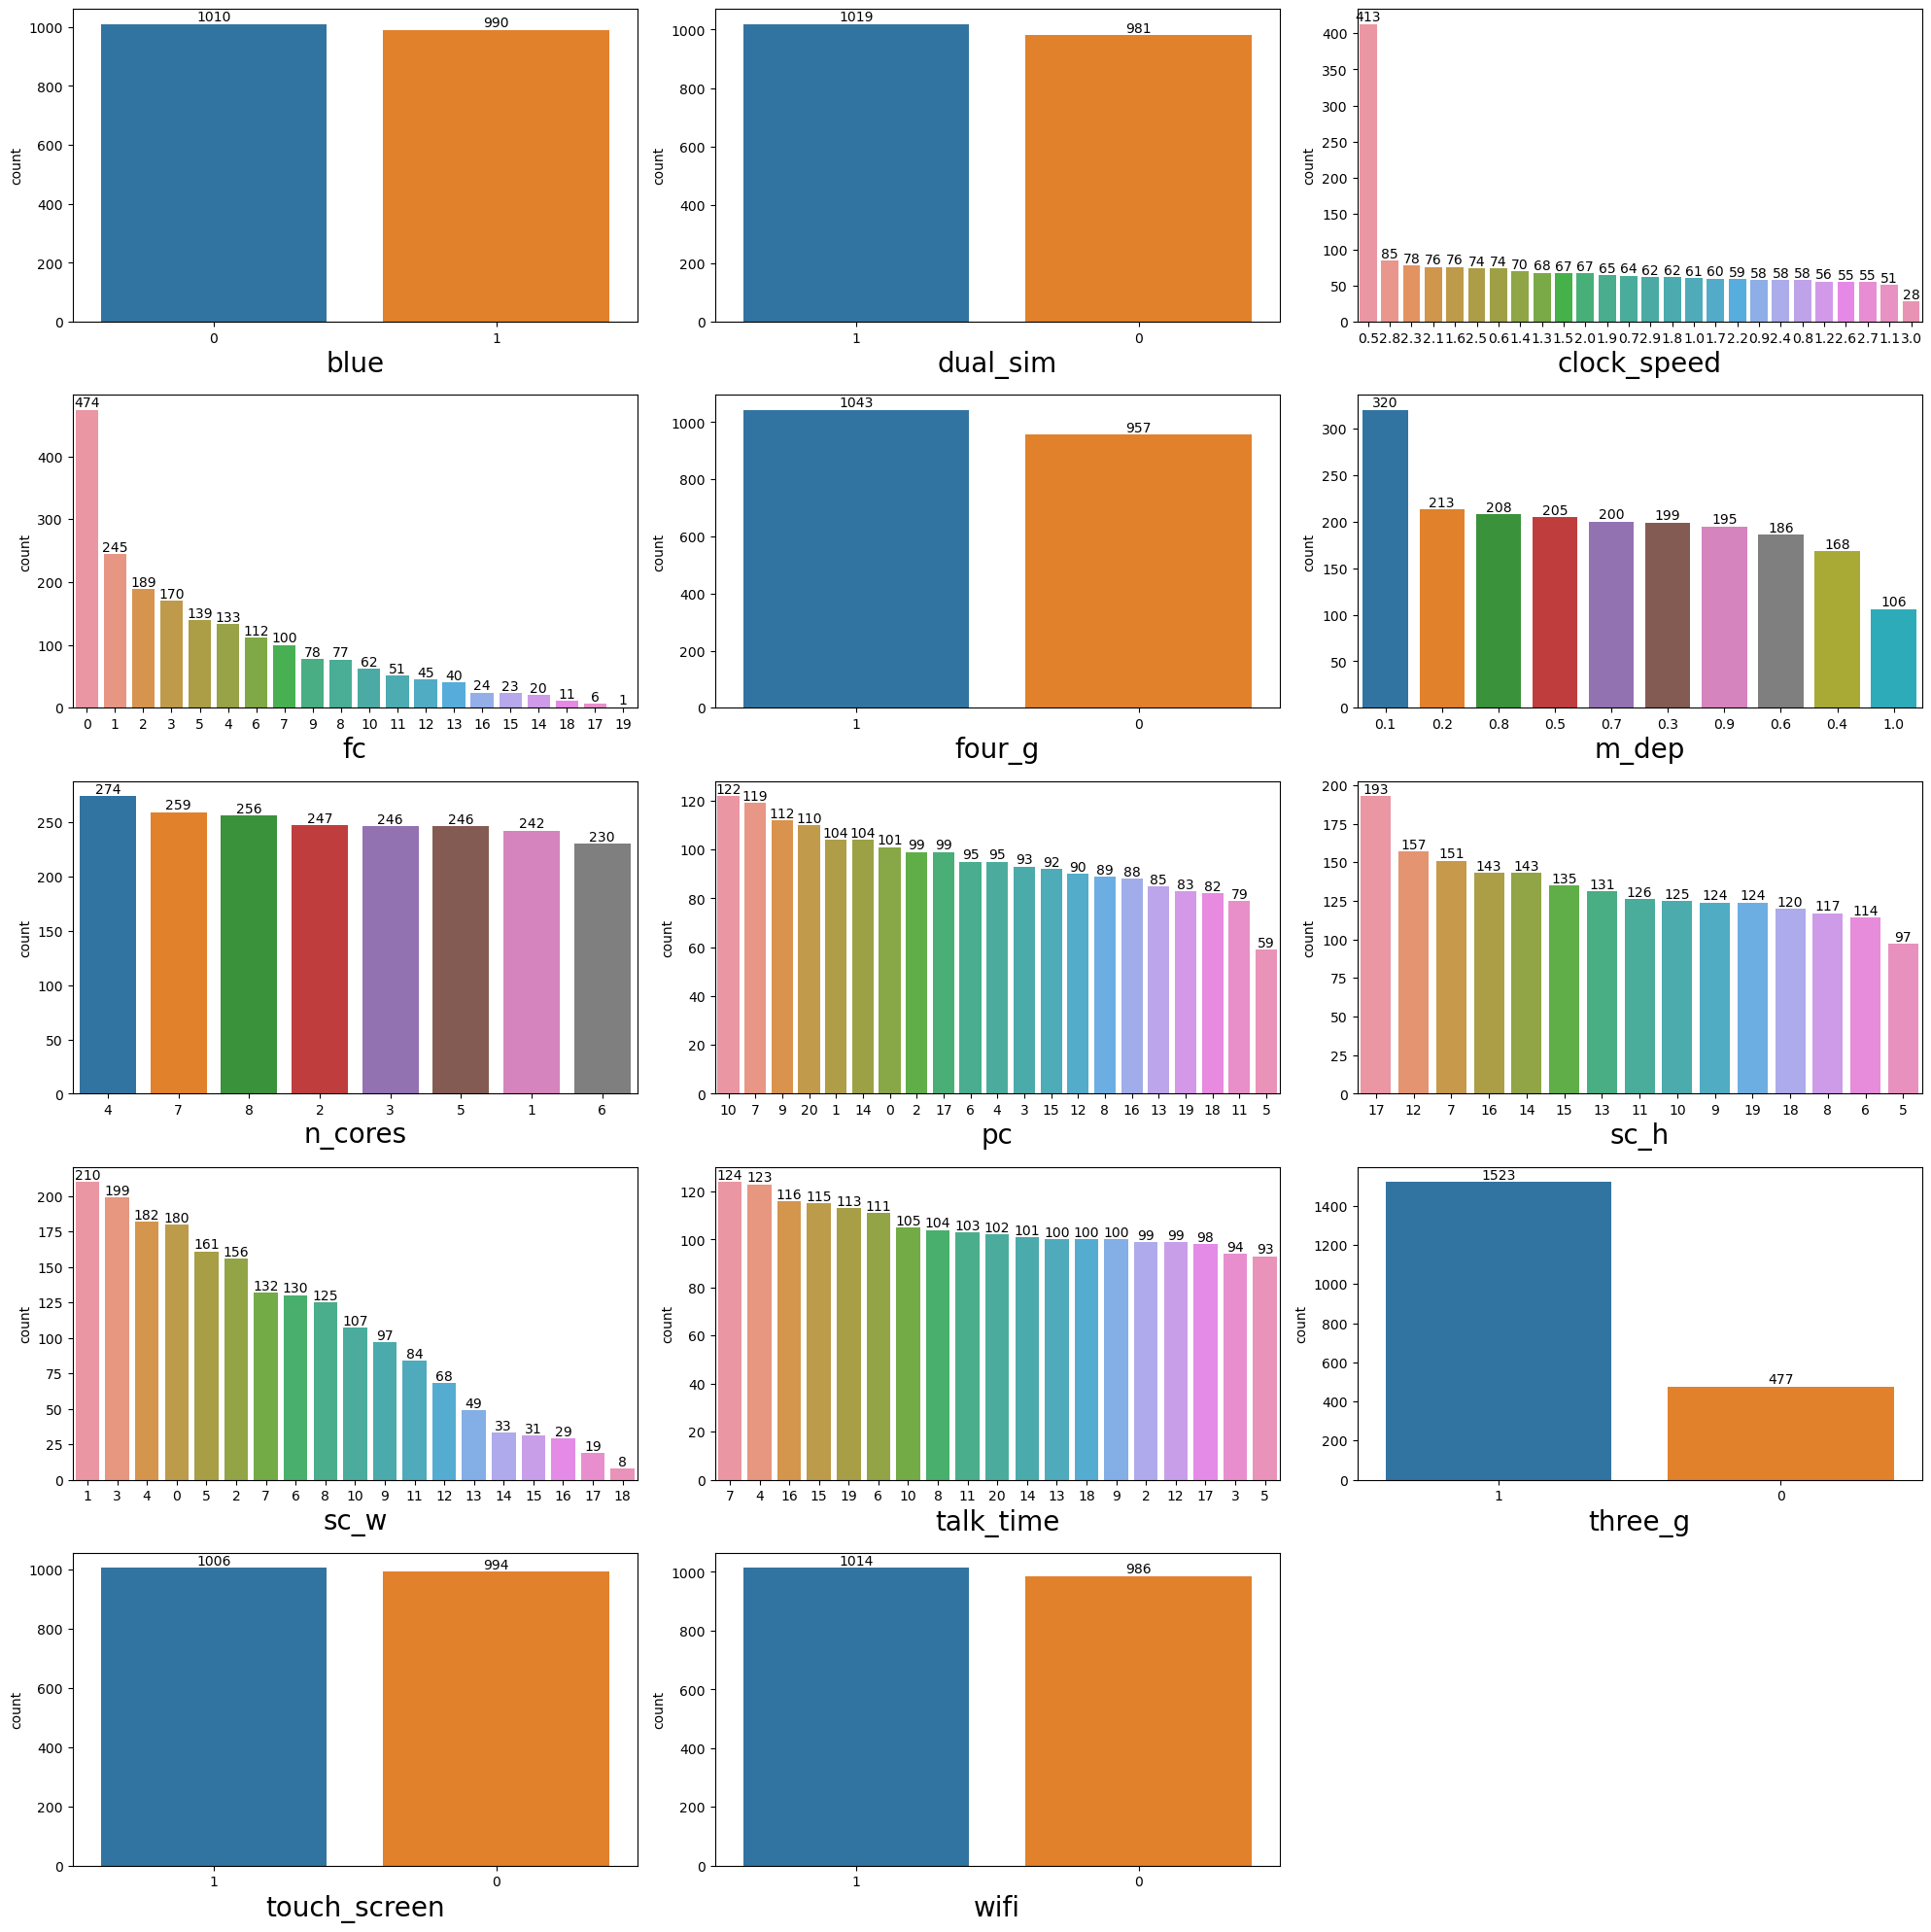

In [20]:
plt.figure(figsize=(20,20))
plotnumber =1
for column in cols_count_plot:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        count=sns.countplot(cols_count_plot[column],order=cols_count_plot[column].value_counts().index)
        plt.xlabel(column,fontsize=20)
        for i in count.containers:
              count.bar_label(i)
    plotnumber+=1
plt.tight_layout()

1. Number of mobile phones having no bluetooth is slightly higher than with bluetooth

2. Number of mobile phones having dual sim is higher than the others

4. Number of mobile phones with 0.5 clock speed is more compared to others

3. Number of mobiles having 3G and 4G feature is used more

4. Mobiles having touch_screen and wifi are used more

5. Number of mobile phones with 4 core is used more

6. More people choose mobile phones having Mobile Depth is 0.1 cm, screen heigth=17,screen width=1.ie, people choose less width and more height


### Pie Diagram showing percentages

percentage of mobiles with not having bluetooth and having dual sim is slightly higher

percentage of price range is equal. and n_core = 4 is slightly higher

mobiles having 3G and 4G is higher

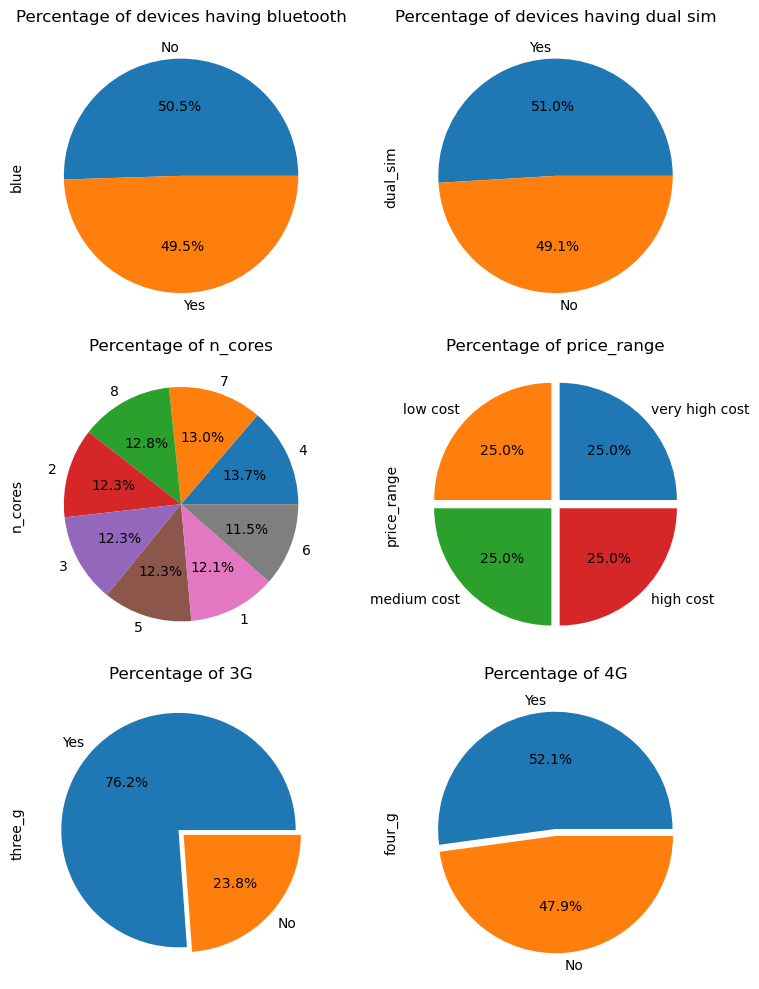

In [21]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(8,10))

train_data["blue"].value_counts().plot(ax=ax[0,0],
    kind="pie",
    autopct="%1.1f%%",
    title= "Percentage of devices having bluetooth",fontsize=10,labels=['No','Yes'])

train_data["dual_sim"].value_counts().head().plot(ax=ax[0,1],
    kind="pie",
    autopct="%1.1f%%",
    fontsize=10,labels=['Yes','No'],
    title= "Percentage of devices having dual sim")
plt.tight_layout()
                                
                                             
train_data["n_cores"].value_counts().plot(ax=ax[1,0],
    kind="pie",
    autopct="%1.1f%%",
    title= "Percentage of n_cores",                                     
    fontsize=10)

train_data['price_range'].value_counts().plot(ax=ax[1,1],
    kind="pie",
    autopct="%1.1f%%",
    title= "Percentage of price_range",labels=['very high cost','low cost','medium cost','high cost'],                                     
    fontsize=10,explode=[0.05,0.05,0.05,0.05]
    )

train_data["three_g"].value_counts().plot(ax=ax[2,0],
    kind="pie",
    autopct="%1.1f%%",
    title= "Percentage of 3G",                                     
    fontsize=10,explode=[0.03,0.03],labels=['Yes','No']
    )
train_data['four_g'].value_counts().plot(ax=ax[2,1],
    kind="pie",
    autopct="%1.1f%%",
    title= "Percentage of 4G",                                     
    fontsize=10,explode=[0.03,0.03],labels=['Yes','No'])
plt.tight_layout()
plt.show()

percentage of mobiles with not having bluetooth and having dual sim is slightly higher

percentage of price range is equal. and n_core = 4 is slightly higher

mobiles having 3G and 4G is higher

# Bivariate analysis

In [22]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [23]:
#comparing other columns with target column

Text(0.5, 1.0, 'swarm plot showing relation between price_range and ram')

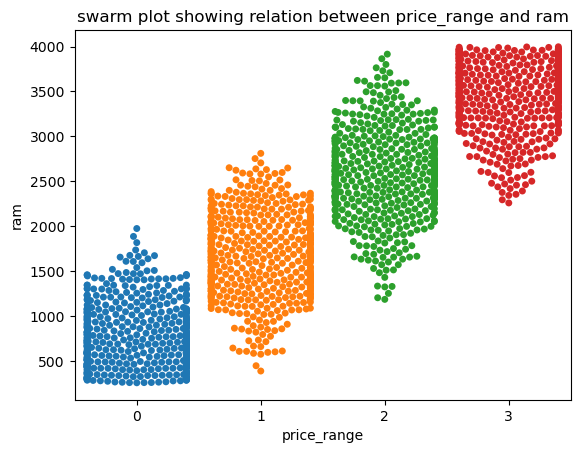

In [24]:
sns.swarmplot(x='price_range',
    y='ram',data=train_data)
plt.title('swarm plot showing relation between price_range and ram')

when the ram size is high price range is also high

Text(0.5, 1.0, 'Relation between battery power and price range')

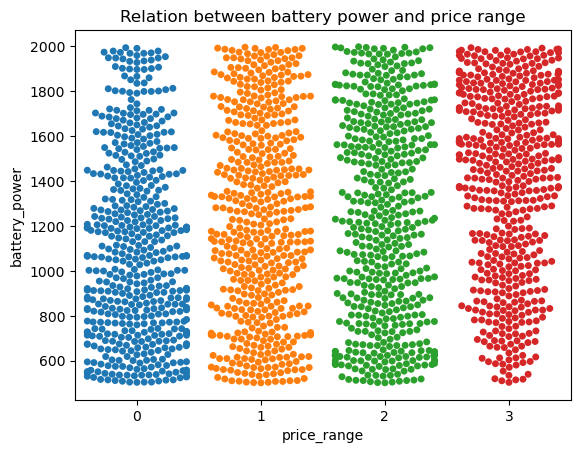

In [25]:
sns.swarmplot(x='price_range',
    y='battery_power',data=train_data)
plt.title('Relation between battery power and price range')

No significant dependency between price_range and battery power

Text(0.5, 1.0, 'Pair plot of price range and mobile weight')

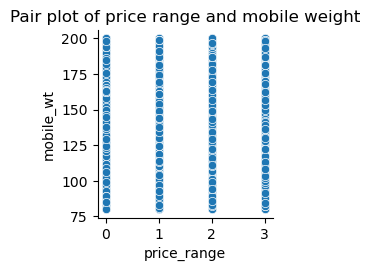

In [26]:
sns.pairplot(x_vars='price_range',y_vars='mobile_wt',data=train_data)
plt.title('Pair plot of price range and mobile weight')

there is no significant relation between price range and mobile wt

In [27]:
px.histogram(data_frame=train_data,x='dual_sim',color='price_range',title='plot between price range and dual_sim or not',barmode='group')

we can't see any significant difference in price range if it is dual sim or nor

In [28]:
px.histogram(data_frame=train_data, x="blue", color="price_range", title="plot of price range and bluetooth devices or not",barmode='group')

we can't see any significant difference in price range if it has bluetooth or not 

In [29]:
px.histogram(data_frame=train_data, x="four_g", color="price_range", title="plot of price range and 4G devices or not",barmode='group')


price range for four g device is slightly higher 

In [30]:
px.histogram(data_frame=train_data, x="three_g", color="price_range", title="plot of price range and 3G devices or not",barmode='group')

price range of 3G devices is high

In [31]:
px.histogram(data_frame=train_data, x="n_cores", color="price_range", title="plot of price range and number of cores",barmode='group')

In [32]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [33]:
px.histogram(data_frame=train_data, x="wifi", color="price_range", title="plot of price range and has wifi or not ",barmode='group')

# Multivariate Analysis

<AxesSubplot:xlabel='touch_screen', ylabel='int_memory'>

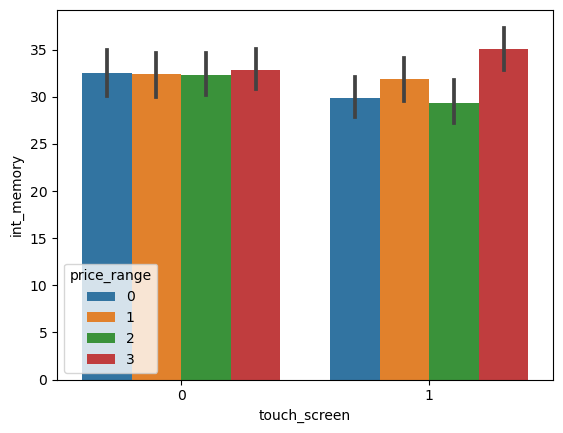

In [34]:
sns.barplot(x='touch_screen',y='int_memory',hue='price_range',data=train_data)

the device with touch_screen and high internal memory have high price range 

<AxesSubplot:xlabel='blue', ylabel='clock_speed'>

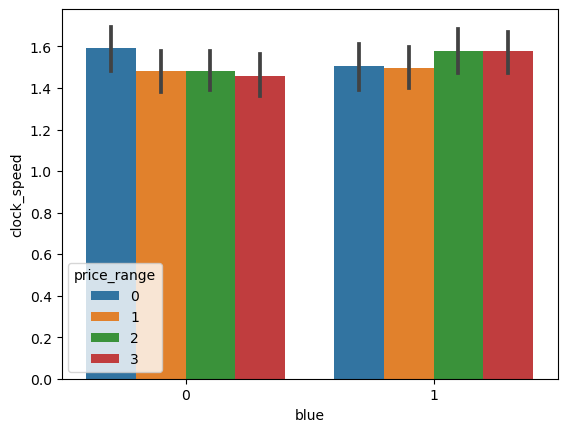

In [35]:
sns.barplot(x='blue',y='clock_speed',hue='price_range',data=train_data)

device with  blue tooth and high clock speed have high price range

# Outlier detection and handling

In [36]:
outlier_cols=train_data[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']]


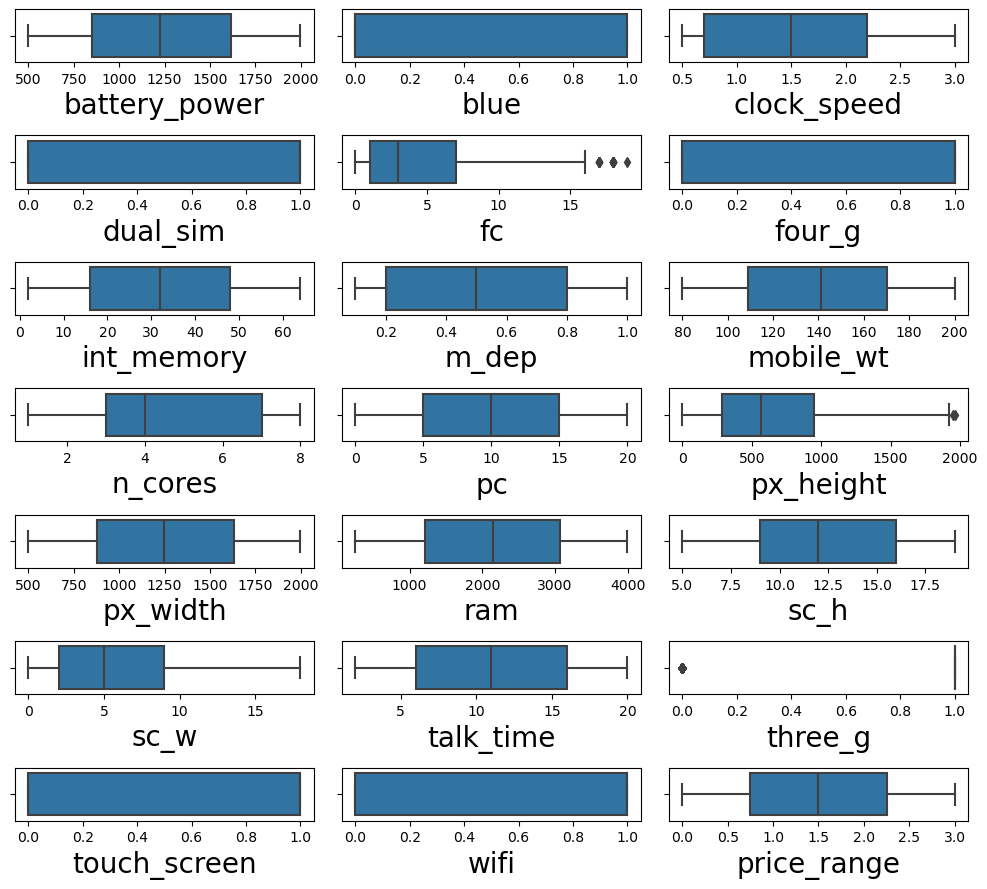

In [37]:
plt.figure(figsize=(10,9))
plotnumber =1
for column in outlier_cols:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(x=outlier_cols[column],data=train_data)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

there is no outliers present in features

In [38]:
train_data.shape

(2000, 21)

In [39]:
#splitting data in to dependent and indipendent columns
x=train_data.drop(['price_range'],axis=1)
y=train_data['price_range']

In [40]:
# Scaling
from sklearn import preprocessing
standadisation=preprocessing.StandardScaler()
x=standadisation.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

0             1             2             3             4   \
count  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean   2.128298e-16 -1.927347e-16 -2.172151e-16  3.990142e-16  9.230117e-17   
std    1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00   
min   -1.678817e+00 -9.900495e-01 -1.253064e+00 -1.019184e+00 -9.928904e-01   
25%   -8.804033e-01 -9.900495e-01 -1.007906e+00 -1.019184e+00 -7.624947e-01   
50%   -2.849593e-02 -9.900495e-01 -2.727384e-02  9.811771e-01 -3.017032e-01   
75%    8.575560e-01  1.010051e+00  8.307794e-01  9.811771e-01  6.198797e-01   
max    1.728812e+00  1.010051e+00  1.811412e+00  9.811771e-01  3.384628e+00   

                 5             6             7             8             9   \
count  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean  -2.048361e-16 -8.754109e-17 -1.045830e-16  1.804112e-16 -4.690692e-17   
std    1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00   
min   -1.043966e+00 -1.656260e+00 -1.393304e+00 -1.702391e+00 -1.539175e+00   
25%   -1.043966e+00 -8.845346e-01 -1.046495e+00 -8.829695e-01 -6.647678e-01   
50%    9.578860e-01 -2.563229e-03 -6.069151e-03  2.122020e-02 -2.275644e-01   
75%    9.578860e-01  8.794082e-01  1.034357e+00  8.406421e-01  1.084046e+00   
max    9.578860e-01  1.761380e+00  1.727974e+00  1.688320e+00  1.521249e+00   

                 10            11            12            13            14  \
count  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean   1.669775e-16  1.287304e-16  5.595524e-17 -1.582068e-16  3.719247e-17   
std    1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00   
min   -1.635631e+00 -1.454027e+00 -1.739251e+00 -1.722711e+00 -1.734608e+00   
25%   -8.109291e-01 -8.167289e-01 -8.719579e-01 -8.453168e-01 -7.849833e-01   
50%    1.377252e-02 -1.828116e-01 -1.045034e-02  2.055123e-02 -7.276497e-02   
75%    8.384742e-01  6.810064e-01  8.828792e-01  8.670548e-01  8.768595e-01   
max    1.663176e+00  2.963672e+00  1.727608e+00  1.727851e+00  1.589078e+00   

                 15            16            17            18            19  
count  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  
mean  -4.085621e-17  1.052491e-16  2.184919e-16  3.065326e-16  4.278800e-16  
std    1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  
min   -1.324131e+00 -1.649584e+00 -1.786861e+00 -1.006018e+00 -1.014099e+00  
25%   -8.649215e-01 -9.173306e-01  5.596406e-01 -1.006018e+00 -1.014099e+00  
50%   -1.761069e-01 -2.013697e-03  5.596406e-01  9.940179e-01  9.860966e-01  
75%    7.423125e-01  9.133032e-01  5.596406e-01  9.940179e-01  9.860966e-01  
max    2.808756e+00  1.645557e+00  5.596406e-01  9.940179e-01  9.860966e-01

In [41]:
#scaling test_data
test_data1=standadisation.fit_transform(test_data)
test_data1=pd.DataFrame(test_data1)
test_data1.describe()

0             1             2             3             4   \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   4.998779e-17 -7.660539e-17 -8.570922e-17 -2.013945e-16 -3.966272e-17   
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00   
min   -1.731692e+00 -1.032529e+00 -1.255832e+00 -1.034598e+00 -1.029568e+00   
25%   -8.178521e-01 -1.032529e+00 -1.014535e+00 -1.034598e+00 -8.054080e-01   
50%   -4.650173e-03  9.684960e-01 -4.934530e-02  9.665588e-01 -3.570874e-01   
75%    8.808493e-01  9.684960e-01  9.158440e-01  9.665588e-01  5.395539e-01   
max    1.736273e+00  9.684960e-01  1.760385e+00  9.665588e-01  3.229478e+00   

                 5             6             7             8             9   \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean  -7.194245e-17 -3.178013e-17  1.016964e-16  1.183931e-16 -7.893686e-17   
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00   
min   -9.743294e-01 -1.746835e+00 -1.487247e+00 -1.708411e+00 -1.455175e+00   
25%   -9.743294e-01 -8.638147e-01 -7.747932e-01 -8.543635e-01 -1.017923e+00   
50%   -9.743294e-01  4.680008e-02 -6.233969e-02 -1.466953e-02 -1.434187e-01   
75%    1.026347e+00  8.470373e-01  1.006341e+00  8.752625e-01  7.310855e-01   
max    1.026347e+00  1.674869e+00  1.718794e+00  1.736487e+00  1.605590e+00   

                 10            11            12            13            14  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean  -4.463097e-17  6.011858e-17  2.511324e-16 -3.841372e-17  1.696421e-16   
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00   
min   -1.650347e+00 -1.449276e+00 -1.681129e+00 -1.724979e+00 -1.619796e+00   
25%   -8.296057e-01 -8.397502e-01 -9.284856e-01 -8.291569e-01 -9.251013e-01   
50%   -8.864010e-03 -1.447171e-01  2.326994e-02  1.333458e-02  1.157824e-03   
75%    9.760260e-01  6.375563e-01  9.056207e-01  8.519182e-01  9.274170e-01   
max    1.632619e+00  2.957800e+00  1.725393e+00  1.701076e+00  1.622111e+00   

                 15            16            17         18            19  
count  1.000000e+03  1.000000e+03  1.000000e+03  1000.0000  1.000000e+03  
mean   7.993606e-18 -1.620926e-16  3.170797e-16     0.0000  1.043610e-17  
std    1.000500e+00  1.000500e+00  1.000500e+00     1.0005  1.000500e+00  
min   -1.254383e+00 -1.653355e+00 -1.760216e+00    -1.0000 -1.014099e+00  
25%   -7.824554e-01 -7.889153e-01  5.681121e-01    -1.0000 -1.014099e+00  
50%   -7.456451e-02 -1.546893e-02  5.681121e-01     0.0000  9.860966e-01  
75%    6.333264e-01  8.944680e-01  5.681121e-01     1.0000  9.860966e-01  
max    2.992963e+00  1.622418e+00  5.681121e-01     1.0000  9.860966e-01

# Model_selection

In [42]:
#splitting as training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =42,test_size=0.33)

In [43]:
# import necessary libraries and fitting with different models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier

In [44]:
models=  {'RandomForestClassifier':RandomForestClassifier(),
          'LogisticRegression':LogisticRegression(),
          'KNeighborsClassifier':KNeighborsClassifier(),
          'SVC':SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'BernoulliNB':BernoulliNB(),
          'GaussianNB':GaussianNB(),
          'XGBClassifier':XGBClassifier()}

for name,model in models.items():
    model.fit(x_train,y_train)
    print(name+'  trained')

RandomForestClassifier  trained
LogisticRegression  trained
KNeighborsClassifier  trained
SVC  trained
DecisionTreeClassifier  trained
BernoulliNB  trained
GaussianNB  trained
XGBClassifier  trained


In [45]:
# Evaluate the performance
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [46]:
model_test_acc=[]
model_test_recall_score=[]
model_test_f1_score=[]
model_test_precision_score=[]
model_conf_mat=[]
#checking the scores of classifiers
for name,model in models.items():
    y_pred=model.predict(x_test)
    model_test_acc.append(accuracy_score(y_test,y_pred))
    model_test_recall_score.append(recall_score(y_test,y_pred,average='weighted'))
    model_test_f1_score.append(f1_score(y_test,y_pred,average='weighted'))
    model_test_precision_score.append(precision_score(y_test,y_pred,average='weighted'))
    model_conf_mat.append(confusion_matrix(y_test,y_pred))
confusion_matrix={'Random Forest':model_conf_mat[0],
                  'Logistic regression':model_conf_mat[1],
                  'KNN':model_conf_mat[2],
                  'SVM':model_conf_mat[3],
                  'DecisionTree':model_conf_mat[4],
                  'BernolliNB':model_conf_mat[5],
                  'GaussianNB':model_conf_mat[6],
                  'XGBClassifier':model_conf_mat[7]
                 }
confusion_matrix

{'Random Forest': array([[163,   6,   0,   0],
        [ 10, 140,  12,   0],
        [  0,  18, 130,  14],
        [  0,   0,  17, 150]], dtype=int64),
 'Logistic regression': array([[162,   7,   0,   0],
        [  3, 157,   2,   0],
        [  0,   7, 149,   6],
        [  0,   0,   2, 165]], dtype=int64),
 'KNN': array([[123,  40,   6,   0],
        [ 48,  75,  35,   4],
        [ 14,  60,  68,  20],
        [  2,  19,  67,  79]], dtype=int64),
 'SVM': array([[152,  17,   0,   0],
        [ 16, 136,  10,   0],
        [  0,  19, 136,   7],
        [  0,   0,  15, 152]], dtype=int64),
 'DecisionTree': array([[151,  18,   0,   0],
        [ 14, 130,  17,   1],
        [  1,  23, 119,  19],
        [  0,   0,  25, 142]], dtype=int64),
 'BernolliNB': array([[111,  58,   0,   0],
        [ 65,  66,  25,   6],
        [  1,  23,  85,  53],
        [  0,   0,  46, 121]], dtype=int64),
 'GaussianNB': array([[154,  15,   0,   0],
        [ 14, 119,  29,   0],
        [  0,  28, 117,  17],
  

In [47]:
Models = ['Random Forest','Logistic regression','KNN','SVM','DecisionTree','BernolliNB','GaussianNB','XGBClassifier']
model_performance = pd.DataFrame({
    'Model':Models,
    'Accuracy_score':model_test_acc,
    'F1_score':model_test_f1_score,
    'Recall_score':model_test_recall_score,
    'Precision_score':model_test_precision_score
    })
model_performance

Model  Accuracy_score  F1_score  Recall_score  \
0        Random Forest        0.883333  0.883044      0.883333   
1  Logistic regression        0.959091  0.959093      0.959091   
2                  KNN        0.522727  0.527195      0.522727   
3                  SVM        0.872727  0.873531      0.872727   
4         DecisionTree        0.821212  0.821765      0.821212   
5           BernolliNB        0.580303  0.576830      0.580303   
6           GaussianNB        0.804545  0.805846      0.804545   
7        XGBClassifier        0.910606  0.910654      0.910606   

   Precision_score  
0         0.882910  
1         0.959953  
2         0.552224  
3         0.874985  
4         0.822740  
5         0.574618  
6         0.807797  
7         0.910841

Logistic Regression gives 95.9% accuracy.so we can choose Logistic regression

In [48]:
logistic=LogisticRegression()
logistic.fit(x_train,y_train)
y_pred = logistic.predict(x_test)

In [49]:
from sklearn import metrics
print('Accuracy:' ,metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9590909090909091


In [50]:
Y_pred=logistic.predict(test_data1)

In [51]:
predictions= pd.DataFrame(Y_pred,columns=['price_range'])
predictions.head()

price_range
0            2
1            3
2            2
3            3
4            1

In [52]:
#concating predicted price range to test data
test_data1=pd.concat([test_data,predictions],axis=1)
test_data1.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1043     1          1.8         1  14       0           5    0.1   
1            841     1          0.5         1   4       1          61    0.8   
2           1807     1          2.8         0   1       0          27    0.9   
3           1546     0          0.5         1  18       1          25    0.5   
4           1434     0          1.4         0  11       1          49    0.5   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        193        3  16        226      1412  3476    12     7          2   
1        191        5  12        746       857  3895     6     0          7   
2        186        3   4       1270      1366  2396    17    10         10   
3         96        8  20        295      1752  3893    10     0          7   
4        108        6  18        749       810  1773    15     8          7   

   three_g  touch_screen  wifi  price_range  
0        0             1     0            2  
1        1             0     0            3  
2        0             1     1            2  
3        1             1     0            3  
4        1             0     1            1

In [53]:
print(train_data.shape)
print(test_data1.shape)

(2000, 21)
(1000, 21)


In [54]:
#mergeing test and train data
df=pd.concat([train_data,test_data1])
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1

In [55]:
df.shape

(3000, 21)

In [56]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Ranking of features

In [57]:
#rank dataset based on price range
df['rank_by_price_range']=df['price_range'].rank(ascending = False) 
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  rank_by_price_range  
0        0             0     1            1               1878.5  
1        1             1     0            2               1136.0  
2        1             1     0            2               1136.0  
3        1             0     0            2               1136.0  
4        1             1     0            1               1878.5

In [58]:
#sorting based on rank_by price_range
df.sort_values('rank_by_price_range')

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
601            1595     1          0.8         1   0       1          44   
6              1718     0          2.4         0   1       0          47   
692             781     0          1.1         0   2       0          38   
5              1464     1          2.9         1   5       1          50   
3              1546     0          0.5         1  18       1          25   
...             ...   ...          ...       ...  ..     ...         ...   
453            1289     0          0.9         0  10       1          25   
1647            771     1          0.5         1   0       1          33   
354            1137     1          0.8         0   3       1           7   
467            1433     0          1.6         0   7       0           4   
102            1008     0          2.3         1   4       1          15   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
601     0.7         85        4  20       1024      1838  3881    14    10   
6       1.0        156        2   3       1283      1374  3873    14     2   
692     0.4        198        5   7        304      1674  3508    13     8   
5       0.8        198        8   9        569       939  3506    10     7   
3       0.5         96        8  20        295      1752  3893    10     0   
...     ...        ...      ...  ..        ...       ...   ...   ...   ...   
453     1.0        178        6  12        765       899  1043     6     2   
1647    0.1        157        3  17        776      1247   920    16     2   
354     1.0        122        3  18        537       620   946    13     4   
467     0.7        133        8  11        281       799   258    11     9   
102     0.4         89        8  19        491       692   450    11     7   

      talk_time  three_g  touch_screen  wifi  price_range  rank_by_price_range  
601           9        1             0     1            3                379.0  
6            10        0             0     0            3                379.0  
692           5        0             0     1            3                379.0  
5             3        1             1     1            3                379.0  
3             7        1             1     0            3                379.0  
...         ...      ...           ...   ...          ...                  ...  
453          11        1             1     0            0               2621.5  
1647         10        1             1     1            0               2621.5  
354           7        1             0     1            0               2621.5  
467           4        1             1     1            0               2621.5  
102          18        1             0     0            0               2621.5  

[3000 rows x 22 columns]

In [59]:
#rank dataset on each features
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'rank_by_price_range'],
      dtype='object')

In [60]:
df["rank_by_battery"] = df["battery_power"].rank(ascending=False)
df["rank_by_blueooth"] = df["blue"].rank(ascending=False)
df["rank_by_clockspeed"] = df["clock_speed"].rank(ascending=False)
df["rank_by_DualSIM"] = df["dual_sim"].rank(ascending=False)
df["rank_by_fc"] = df["fc"].rank(ascending=False)
df["rank_by_4G"] = df["four_g"].rank(ascending=False)
df["rank_by_InternalMemory"] = df["int_memory"].rank(ascending=False)
df["rank_by_mdep"] = df["m_dep"].rank(ascending=False)
df["rank_by_weight"] = df["mobile_wt"].rank(ascending=True)
df["rank_by_ncores"] = df["n_cores"].rank(ascending=False)
df["rank_by_pc"] = df["pc"].rank(ascending=False)
df["rank_by_height"] = df["px_height"].rank(ascending=False)
df["rank_by_width"] = df["px_width"].rank(ascending=False)
df["rank_by_ram"] = df["ram"].rank(ascending=False)
df["rank_by_sch"] = df["sc_h"].rank(ascending=False)
df["rank_by_scw"] = df["sc_w"].rank(ascending=False)
df["rank_by_talktime"] = df["talk_time"].rank(ascending=False)
df["rank_by_3G"] = df["three_g"].rank(ascending=False)
df["rank_by_touchscreen"] = df["touch_screen"].rank(ascending=False)
df["rank_by_wifi"] = df["wifi"].rank(ascending=False)

In [61]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  rank_by_price_range  \
0        0             0     1            1               1878.5   
1        1             1     0            2               1136.0   
2        1             1     0            2               1136.0   
3        1             0     0            2               1136.0   
4        1             1     0            1               1878.5   

   rank_by_battery  rank_by_blueooth  rank_by_clockspeed  rank_by_DualSIM  \
0           2293.0            2253.5               801.5           2268.5   
1           1930.0             753.5              2694.5            768.5   
2           2866.5             753.5              2694.5            768.5   
3           2758.0             753.5               505.5           2268.5   
4            363.0             753.5              1791.0           2268.5   

   rank_by_fc  rank_by_4G  rank_by_InternalMemory  rank_by_mdep  \
0      2132.0      2265.5                  2734.0        1213.5   
1      2658.5       765.5                   524.5         921.0   
2      1804.5       765.5                  1102.5         306.5   
3      2658.5      2265.5                  2575.5         614.0   
4       169.0       765.5                   947.0        1213.5   

   rank_by_weight  rank_by_ncores  rank_by_pc  rank_by_height  rank_by_width  \
0          2687.0          2430.0      2627.5          2948.5         2470.5   
1          1409.5          2053.0      2090.0           795.5           22.0   
2          1616.5          1262.5      2090.0           317.0          572.0   
3          1276.5           909.0      1634.5           372.5          416.5   
4          1523.5          2430.0       930.0           385.5         1582.0   

   rank_by_ram  rank_by_sch  rank_by_scw  rank_by_talktime  rank_by_3G  \
0       1163.5       2159.0       1020.0             249.0      2640.0   
1       1092.0        501.0       1995.0            2139.0      1140.0   
2       1116.0       1785.0       2268.0            1819.0      1140.0   
3        986.0        738.5        836.0            1490.0      1140.0   
4       2086.0       2346.5       2268.0             880.0      1140.0   

   rank_by_touchscreen  rank_by_wifi  
0               2253.5         761.0  
1                753.5        2261.0  
2                753.5        2261.0  
3               2253.5        2261.0  
4                753.5        2261.0

In [62]:
df2=df.sort_values('rank_by_price_range')
df2.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
601           1595     1          0.8         1   0       1          44   
6             1718     0          2.4         0   1       0          47   
692            781     0          1.1         0   2       0          38   
5             1464     1          2.9         1   5       1          50   
3             1546     0          0.5         1  18       1          25   

     m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
601    0.7         85        4  20       1024      1838  3881    14    10   
6      1.0        156        2   3       1283      1374  3873    14     2   
692    0.4        198        5   7        304      1674  3508    13     8   
5      0.8        198        8   9        569       939  3506    10     7   
3      0.5         96        8  20        295      1752  3893    10     0   

     talk_time  three_g  touch_screen  wifi  price_range  rank_by_price_range  \
601          9        1             0     1            3                379.0   
6           10        0             0     0            3                379.0   
692          5        0             0     1            3                379.0   
5            3        1             1     1            3                379.0   
3            7        1             1     0            3                379.0   

     rank_by_battery  rank_by_blueooth  rank_by_clockspeed  rank_by_DualSIM  \
601            794.5             753.5              2139.0            768.5   
6              566.5            2253.5               606.0           2268.5   
692           2419.0            2253.5              1874.5           2268.5   
5             1051.5             753.5                99.5            768.5   
3              902.5            2253.5              2694.5            768.5   

     rank_by_fc  rank_by_4G  rank_by_InternalMemory  rank_by_mdep  \
601      2658.5       765.5                   947.0         921.0   
6        2132.0      2265.5                   803.5          78.0   
692      1804.5      2265.5                  1251.0        1814.5   
5        1102.0       765.5                   669.0         614.0   
3          14.0       765.5                  1862.0        1519.0   

     rank_by_weight  rank_by_ncores  rank_by_pc  rank_by_height  \
601           141.0          1658.5        83.0           608.5   
6            1893.0          2430.0      2484.5           302.0   
692          2925.5          1262.5      1929.0          2172.5   
5            2925.5           189.0      1634.5          1489.5   
3             407.5           189.0        83.0          2199.0   

     rank_by_width  rank_by_ram  rank_by_sch  rank_by_scw  rank_by_talktime  \
601          313.0        106.0       1156.0        529.0            1819.0   
6           1250.5        110.0       1156.0       2268.0            1655.0   
692          657.0        391.0       1364.5        836.0            2457.5   
5           2105.0        393.5       1973.0       1020.0            2779.0   
3            490.0         94.0       1973.0       2854.5            2139.0   

     rank_by_3G  rank_by_touchscreen  rank_by_wifi  
601      1140.0               2253.5         761.0  
6        2640.0               2253.5        2261.0  
692      2640.0               2253.5         761.0  
5        1140.0                753.5         761.0  
3        1140.0                753.5        2261.0

In [63]:
ranked_dataset=df2.iloc[:,21:]
ranked_dataset.head()

rank_by_price_range  rank_by_battery  rank_by_blueooth  \
601                379.0            794.5             753.5   
6                  379.0            566.5            2253.5   
692                379.0           2419.0            2253.5   
5                  379.0           1051.5             753.5   
3                  379.0            902.5            2253.5   

     rank_by_clockspeed  rank_by_DualSIM  rank_by_fc  rank_by_4G  \
601              2139.0            768.5      2658.5       765.5   
6                 606.0           2268.5      2132.0      2265.5   
692              1874.5           2268.5      1804.5      2265.5   
5                  99.5            768.5      1102.0       765.5   
3                2694.5            768.5        14.0       765.5   

     rank_by_InternalMemory  rank_by_mdep  rank_by_weight  rank_by_ncores  \
601                   947.0         921.0           141.0          1658.5   
6                     803.5          78.0          1893.0          2430.0   
692                  1251.0        1814.5          2925.5          1262.5   
5                     669.0         614.0          2925.5           189.0   
3                    1862.0        1519.0           407.5           189.0   

     rank_by_pc  rank_by_height  rank_by_width  rank_by_ram  rank_by_sch  \
601        83.0           608.5          313.0        106.0       1156.0   
6        2484.5           302.0         1250.5        110.0       1156.0   
692      1929.0          2172.5          657.0        391.0       1364.5   
5        1634.5          1489.5         2105.0        393.5       1973.0   
3          83.0          2199.0          490.0         94.0       1973.0   

     rank_by_scw  rank_by_talktime  rank_by_3G  rank_by_touchscreen  \
601        529.0            1819.0      1140.0               2253.5   
6         2268.0            1655.0      2640.0               2253.5   
692        836.0            2457.5      2640.0               2253.5   
5         1020.0            2779.0      1140.0                753.5   
3         2854.5            2139.0      1140.0                753.5   

     rank_by_wifi  
601         761.0  
6          2261.0  
692         761.0  
5           761.0  
3          2261.0

In [64]:
ranked_dataset.shape

(3000, 21)

            predicted the price_range for test_data and merged with train_data.ranked the dataset successfully.